# Baseline
- [Prepare_ys](#Prepare-ys)</BR>
- [Body](#Body)</BR>
- [Title](#Title)</BR>
- [Evals](#Evals)</BR>

In [1]:
import importlib
import os
from joblib import dump, load

import numpy as np
import pandas as pd

import ml.explo as mlexplo
import ml.prepare as mlprepare

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

data_path = "..\\data\\stackoverflow\\"
model_path = data_path + "models\\"
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = "{:,.2f}".format

# Prepare ys
- [Toc](#Baseline)

In [2]:
def prepare_baseline_ys(df, tags, col):
    ret =  dict({})
    for tag in tags.index:
        sr_tag = df[col].copy(deep=True)
        sr_tag = sr_tag.apply(lambda x: 1 if tag in x else 0)
        ret[tag] = sr_tag
    return ret

init_y = False
if init_y:
    df_top = pd.read_pickle(data_path + 'Top_Tags.pkl')
    df_top_test = pd.read_pickle(data_path + 'Top_Tags_test.pkl')
    
    tags_10 = mlprepare.prepare_multi_label(df_top,'Tags_T10')
    y_dict_10 = prepare_baseline_ys(df_top, tags_10, 'Tags_T10')
    dump(y_dict_10, data_path + 'baseline_y_top10.joblib')
    tags_10_test = mlprepare.prepare_multi_label(df_top_test,'Tags_T10')
    y_dict_10_test = prepare_baseline_ys(df_top_test, tags_10_test, 'Tags_T10')
    dump(y_dict_10_test, data_path + 'baseline_y_top10_test.joblib')

    tags_50 = mlprepare.prepare_multi_label(df_top,'Tags_T50')
    y_dict_50 = prepare_baseline_ys(df_top, tags_50, 'Tags_T50')
    dump(y_dict_50, data_path + 'baseline_y_top50.joblib')
    tags_50_test = mlprepare.prepare_multi_label(df_top_test,'Tags_T50')
    y_dict_50_test = prepare_baseline_ys(df_top_test, tags_50_test, 'Tags_T50')
    dump(y_dict_50_test, data_path + 'baseline_y_top50_test.joblib')

    tags_100 = mlprepare.prepare_multi_label(df_top,'Tags_T100')
    y_dict_100 = prepare_baseline_ys(df_top, tags_100, 'Tags_T100')
    dump(y_dict_100, data_path + 'baseline_y_top100.joblib')
    tags_100_test = mlprepare.prepare_multi_label(df_top_test,'Tags_T100')
    y_dict_100_test = prepare_baseline_ys(df_top_test, tags_100_test, 'Tags_T100')
    dump(y_dict_100_test, data_path + 'baseline_y_top100_test.joblib')

In [3]:
y_dict = load(data_path + 'baseline_y_top50.joblib')
y_dict_test = load(data_path + 'baseline_y_top50_test.joblib')

df_stem = pd.read_pickle(data_path + 'nltk_stop_stem.pkl')
df_stem_test = pd.read_pickle(data_path + 'nltk_stop_stem_test.pkl')

title_vectorizer = load(model_path + 'stem_title_vectorizer.joblib')
body_vectorizer = load(model_path + 'stem_body_vectorizer_11.joblib')

X_title = title_vectorizer.transform(df_stem['Title'].apply(lambda row: ' '.join(row)))
X_title_test = title_vectorizer.transform(df_stem_test['Title'].apply(lambda row: ' '.join(row)))

X_body = body_vectorizer.transform(df_stem['Body'].apply(lambda row: ' '.join(row)))
X_body_test = body_vectorizer.transform(df_stem_test['Body'].apply(lambda row: ' '.join(row)))


In [4]:
y_dict.keys()

dict_keys(['python', 'other', 'javascript', 'r', 'pandas', 'c++', 'java', 'c#', 'python-3.x', 'sql', 'dataframe', 'reactjs', 'html', 'arrays', 'regex', 'c', 'css', 'php', 'swift', 'typescript', 'node.js', 'android', 'amazon-web-services', 'numpy', 'mysql', 'jquery', 'swiftui', 'postgresql', 'json', 'django', 'vue.js', 'list', 'ios', 'string', 'dplyr', 'google-sheets', 'angular', 'mongodb', 'sql-server', 'ggplot2', 'bash', 'excel', 'powershell', 'wordpress', 'google-apps-script', 'rust', 'git', 'algorithm', 'matplotlib', 'flutter', 'firebase'])

In [74]:
df_top

,Tags_T100,Tags_T50,Tags_T10
0,"[python, pandas, dataframe]","[python, pandas, dataframe]","[python, pandas, dataframe]"
1,"[scala, generics]",[other],[other]
2,"[python, loops]",[python],[python]
3,"[r, for-loop]",[r],[r]
4,"[c#, regex]","[c#, regex]",[c#]
...,...,...,...
96415,"[php, web-scraping]",[php],[other]
96416,[r],[r],[r]
96417,"[javascript, reactjs]","[javascript, reactjs]",[javascript]
96418,"[arrays, c]","[arrays, c]",[other]


Reverse :  [array(['df', 'array'], dtype='<U22')]
Title_model: [0]
Body_model: [0]


In [46]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_body, y_dict['python'], 
#                                                         random_state=42,
                                                        test_size=0.2, shuffle=True)

clf = RandomForestClassifier(n_jobs=6)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=6)

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
score = clf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, score[:,1])

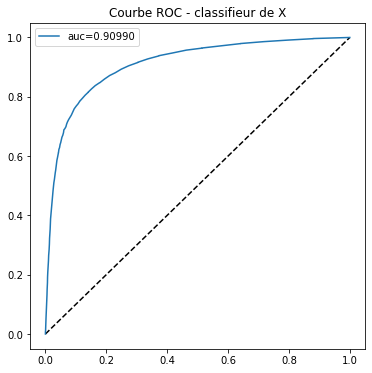

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de X')
ax.legend();

In [10]:
params = {
    'alpha': np.arange(10)*.1+.05,
    'max_iter': [25],
    'solver': ['sag']

    }

gs_clf = GridSearchCV(
    RidgeClassifier(),
    params,
    n_jobs=6)

for count in (np.arange(10)+1)*5000:
    gs_clf.fit(X_train[:count], y_train[:count])
    print(gs_clf.best_estimator_)
    print(gs_clf.best_estimator_.score(X_test, y_test))

RidgeClassifier(alpha=0.6500000000000001, max_iter=25, solver='sag')
0.8550611906243518
RidgeClassifier(alpha=0.9500000000000001, max_iter=25, solver='sag')
0.8600394109105994
RidgeClassifier(alpha=0.45, max_iter=25, solver='sag')
0.8614395353661066
RidgeClassifier(alpha=0.05, max_iter=25, solver='sag')
0.8622173822858328
RidgeClassifier(alpha=0.05, max_iter=25, solver='sag')
0.8618025305953122
RidgeClassifier(alpha=0.15000000000000002, max_iter=25, solver='sag')
0.8627359468989836
RidgeClassifier(alpha=0.05, max_iter=25, solver='sag')
0.8636693632026551
RidgeClassifier(alpha=0.05, max_iter=25, solver='sag')
0.8636693632026551
RidgeClassifier(alpha=0.05, max_iter=25, solver='sag')
0.8636693632026551
RidgeClassifier(alpha=0.15000000000000002, max_iter=25, solver='sag')
0.8635137938187099


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_body, y_dict['python'], random_state=42, test_size=0.2, shuffle=True)
params = {
    'alpha': np.arange(10)*.1+.1,
    'max_iter': [20],
    'solver': ['sag']
    }
clf = GridSearchCV(
    RidgeClassifier(),
    params,
    n_jobs=6)
clf.fit(X_train, y_train)
clf.best_estimator_

RidgeClassifier(alpha=0.1, max_iter=20, solver='sag')

In [12]:
clf.classes_

array([0, 1], dtype=int64)

In [13]:
clf.best_estimator_.score(X_test, y_test)

0.8614395353661066

In [14]:
dump(clf.best_estimator_, data_path + 'baseline_python.joblib')

['..\\data\\stackoverflow\\baseline_python.joblib']

# Body
- [Toc](#Baseline)

In [49]:
params = {
    'alpha': np.arange(10)*.1+.1,
    'max_iter': [25],
    }
clf = GridSearchCV(
    RidgeClassifier(),
    params,
    n_jobs=6)

baseline =  dict({})

for k in y_dict.keys():
    print("classifying:", k)
    X_train, X_test, y_train, y_test = train_test_split(X_body, y_dict[k], random_state=42, test_size=0.2, shuffle=True)
#     X_train, X_test, y_train, y_test = train_test_split(X_title, y_dict[k], random_state=42, test_size=0.2, shuffle=True)
#     clf = RidgeClassifier().fit(X_train, y_train)
    clf = GridSearchCV(
        RidgeClassifier(),
        params,
        n_jobs=6)
    clf.fit(X_train, y_train)
    baseline[k] = clf.best_estimator_
    print("GS best:", clf.best_estimator_)
    print("clf score: ", clf.best_estimator_.score(X_test, y_test))
    pred = clf.best_estimator_.predict(X_test)
    f1 = metrics.f1_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    print("F1:   %0.3f, precision: %0.3f, recall: %0.3f" % (f1, precision, recall))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    print("=========================")
dump(baseline, model_path + 'body_ridgeClassifier.joblib')

classifying: python
GS best: RidgeClassifier(alpha=0.7000000000000001, max_iter=25)
clf score:  0.877929890064302
F1:   0.605, precision: 0.802, recall: 0.485
confusion matrix:
[[15130   444]
 [ 1910  1800]]
classifying: other
GS best: RidgeClassifier(alpha=0.7000000000000001, max_iter=25)
clf score:  0.8906347230864966
F1:   0.396, precision: 0.763, recall: 0.268
confusion matrix:
[[16483   215]
 [ 1894   692]]
classifying: javascript
GS best: RidgeClassifier(max_iter=25)
clf score:  0.9116365899191039
F1:   0.453, precision: 0.727, recall: 0.329
confusion matrix:
[[16873   265]
 [ 1439   707]]
classifying: r
GS best: RidgeClassifier(alpha=0.2, max_iter=25)
clf score:  0.9484546774528106
F1:   0.547, precision: 0.856, recall: 0.401
confusion matrix:
[[17691   101]
 [  893   599]]
classifying: pandas
GS best: RidgeClassifier(alpha=0.4, max_iter=25)
clf score:  0.9599149554034433
F1:   0.666, precision: 0.859, recall: 0.543
confusion matrix:
[[17741   126]
 [  647   770]]
classifying: c

C:\Users\vince\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.9893175689690935
F1:   0.304, precision: 0.833, recall: 0.186
confusion matrix:
[[19033     9]
 [  197    45]]
classifying: google-sheets
GS best: RidgeClassifier(alpha=0.30000000000000004, max_iter=25)
clf score:  0.991547396805642
F1:   0.551, precision: 0.775, recall: 0.427
confusion matrix:
[[19021    29]
 [  134   100]]
classifying: angular
GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.9919103920348475
F1:   0.506, precision: 0.860, recall: 0.359
confusion matrix:
[[19048    13]
 [  143    80]]
classifying: mongodb
GS best: RidgeClassifier(alpha=0.2, max_iter=25)
clf score:  0.9950217797137524
F1:   0.660, precision: 0.930, recall: 0.511
confusion matrix:
[[19095     7]
 [   89    93]]
classifying: sql-server
GS best: RidgeClassifier(alpha=0.5, max_iter=25)
clf score:  0.9907176934246007
F1:   0.101, precision: 0.625, recall: 0.055
confusion matrix:
[[19095     6]
 [  173    10]]
classifying: ggplot2
G

['..\\data\\stackoverflow\\models\\body_ridgeClassifier.joblib']

# Title
- [Toc](#Baseline)

In [50]:
params = {
    'alpha': np.arange(10)*.1+.1,
    'max_iter': [25],
    }
clf = GridSearchCV(
    RidgeClassifier(),
    params,
    n_jobs=6)

baseline =  dict({})

for k in y_dict.keys():
    print("classifying:", k)
    X_train, X_test, y_train, y_test = train_test_split(X_title, y_dict[k], random_state=42, test_size=0.2, shuffle=True)
#     X_train, X_test, y_train, y_test = train_test_split(X_title, y_dict[k], random_state=42, test_size=0.2, shuffle=True)
#     clf = RidgeClassifier().fit(X_train, y_train)
    clf = GridSearchCV(
        RidgeClassifier(),
        params,
        n_jobs=6)
    clf.fit(X_train, y_train)
    baseline[k] = clf.best_estimator_
    print("GS best:", clf.best_estimator_)
    print("clf score: ", clf.best_estimator_.score(X_test, y_test))
    pred = clf.best_estimator_.predict(X_test)
    f1 = metrics.f1_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    print("F1:   %0.3f, precision: %0.3f, recall: %0.3f" % (f1, precision, recall))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    print("=========================")
dump(baseline, model_path + 'title_ridgeClassifier.joblib')

classifying: python
GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.8936942543040863
F1:   0.661, precision: 0.854, recall: 0.540
confusion matrix:
[[15231   343]
 [ 1707  2003]]
classifying: other
GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.8894420244762498
F1:   0.392, precision: 0.747, recall: 0.265
confusion matrix:
[[16466   232]
 [ 1900   686]]
classifying: javascript
GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.9156813939016801
F1:   0.477, precision: 0.770, recall: 0.345
confusion matrix:
[[16917   221]
 [ 1405   741]]
classifying: r
GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.940209500103713
F1:   0.402, precision: 0.888, recall: 0.260
confusion matrix:
[[17743    49]
 [ 1104   388]]
classifying: pandas
GS best: RidgeClassifier(alpha=0.2, max_iter=25)
clf score:  0.9683157021364862
F1:   0.737, precision: 0.946, recall: 0.603
confusion matrix:
[[17818    49]
 [  562   855]]
classifying: c++
GS best: RidgeCl

C:\Users\vince\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.9905102675793404
F1:   0.408, precision: 0.940, recall: 0.260
confusion matrix:
[[19038     4]
 [  179    63]]
classifying: google-sheets
GS best: RidgeClassifier(alpha=0.7000000000000001, max_iter=25)
clf score:  0.9933105164903547
F1:   0.670, precision: 0.834, recall: 0.560
confusion matrix:
[[19024    26]
 [  103   131]]
classifying: angular
GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.9942439327940261
F1:   0.674, precision: 0.975, recall: 0.516
confusion matrix:
[[19058     3]
 [  108   115]]
classifying: mongodb
GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.997407176934246
F1:   0.851, precision: 0.929, recall: 0.786
confusion matrix:
[[19091    11]
 [   39   143]]
classifying: sql-server
GS best: RidgeClassifier(alpha=0.1, max_iter=25)
clf score:  0.9908214063472308
F1:   0.102, precision: 0.714, recall: 0.055
confusion matrix:
[[19097     4]
 [  173    10]]
classifying: ggplot2
GS

['..\\data\\stackoverflow\\models\\title_ridgeClassifier.joblib']

In [51]:
clf = RidgeClassifier().fit(X_title, y_dict['javascript'])

In [52]:
clf.score(X_title, y_dict['javascript'])

0.9156606513171541

# Evals
- [Toc](#Baseline)

In [4]:
body_model = load(model_path + 'body_RidgeClassifier.joblib')
title_model = load(model_path + 'title_RidgeClassifier.joblib')

In [5]:



body_model['javascript'].score(X_body, y_dict['javascript'])

0.9156502800248911

In [6]:
y_dict_50_test = load(data_path + 'baseline_y_top50_test.joblib')

In [7]:
df_stem_test = pd.read_pickle(data_path + 'nltk_stop_stem_test.pkl')

In [8]:
body_vectorizer = load(model_path + 'stem_body_vectorizer_11.joblib')

df_stem_test['Body'] = df_stem_test['Body'].apply(lambda row: ' '.join(row))
X_body_test = body_vectorizer.transform(df_stem_test['Body'])

In [9]:
body_model['python'].score(X_body_test, y_dict_50_test['python'])

0.8751084128360798

In [10]:
pred = body_model['python'].predict(X_body_test)


In [11]:
metrics.confusion_matrix(y_dict_50_test['python'], pred)

array([[10796,   362],
       [ 1366,  1312]], dtype=int64)

In [13]:
metrics.precision_score(y_dict_50_test['python'], pred)

0.7837514934289128

In [14]:
metrics.recall_score(y_dict_50_test['python'], pred)

0.4899178491411501

In [21]:
precis = 0
recall = 0
f1 = 0
cpt = 0
for k in y_dict.keys():
    try:
        pred = body_model[k].predict(X_body_test)
        precis = precis + metrics.precision_score(y_dict_50_test[k], pred)
        recall = recall + metrics.recall_score(y_dict_50_test[k], pred)
        f1 = f1 +  metrics.f1_score(y_dict_50_test[k], pred)
        cpt = cpt + 1
    except:
        print("Issue: ", k)
        None
print("Mean Precision: ", precis/cpt)
print("Mean Recall: ", recall/cpt)
print("Mean F1: ", f1/cpt)

Issue:  woocommerce
Mean Precision:  0.7799111252761556
Mean Recall:  0.3261938102431698
Mean F1:  0.4455260838140447


C:\Users\vince\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
y_dict_test.keys()

dict_keys(['python', 'other', 'javascript', 'pandas', 'r', 'c++', 'java', 'dataframe', 'reactjs', 'c#', 'sql', 'python-3.x', 'regex', 'html', 'c', 'arrays', 'php', 'typescript', 'css', 'node.js', 'android', 'postgresql', 'jquery', 'numpy', 'json', 'dplyr', 'excel', 'mysql', 'django', 'swift', 'list', 'amazon-web-services', 'string', 'vba', 'vue.js', 'wordpress', 'rust', 'woocommerce', 'mongodb', 'bash', 'powershell', 'angular', 'sql-server', 'apache-spark', 'git', 'ggplot2', 'kotlin', 'multithreading', 'dictionary', 'algorithm', 'scala'])

In [70]:
y_dict.keys()

dict_keys(['python', 'other', 'javascript', 'r', 'pandas', 'c++', 'java', 'c#', 'python-3.x', 'sql', 'dataframe', 'reactjs', 'html', 'arrays', 'regex', 'c', 'css', 'php', 'swift', 'typescript', 'node.js', 'android', 'amazon-web-services', 'numpy', 'mysql', 'jquery', 'swiftui', 'postgresql', 'json', 'django', 'vue.js', 'list', 'ios', 'string', 'dplyr', 'google-sheets', 'angular', 'mongodb', 'sql-server', 'ggplot2', 'bash', 'excel', 'powershell', 'wordpress', 'google-apps-script', 'rust', 'git', 'algorithm', 'matplotlib', 'flutter', 'firebase'])